<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import sklearn as sk


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples = 1000)

In [4]:
data = pd.DataFrame(data = {'variable1' : X[:,0], 'variable2': X[:,1], 'label': y})

In [5]:
data

,variable1,variable2,label
0,-0.414376,-0.910106,0
1,-0.248690,0.968583,0
2,-0.025130,0.999684,0
3,-0.150226,0.988652,0
4,-0.256755,0.757679,1
...,...,...,...
995,0.037690,-0.999289,0
996,0.425779,0.904827,0
997,-0.693653,0.720309,0
998,-0.670022,-0.437115,1


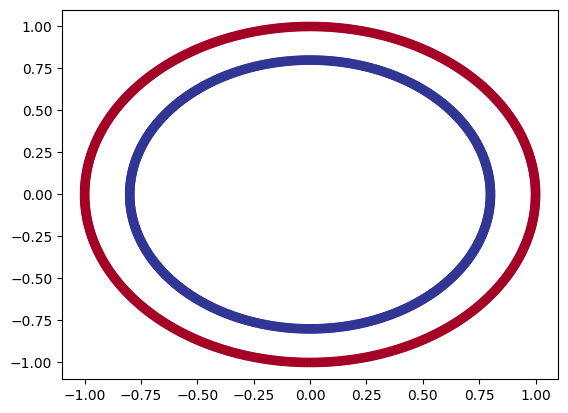

In [6]:
plt.scatter(data['variable1'],data['variable2'],c = y,cmap=plt.cm.RdYlBu)

In [7]:
y_tes = data['label']

In [8]:
import torch
y_tes = y_tes.to_numpy()

In [9]:
y_tes = torch.from_numpy(y_tes)

In [10]:
data = data.drop('label',axis = 1)

In [11]:
X_tes = data.to_numpy()

In [12]:
X_tes = torch.from_numpy(X_tes)

In [13]:
X_tes.shape

torch.Size([1000, 2])

In [14]:
X_tes = torch.tensor(X_tes, dtype = torch.float32)
y_tes = torch.tensor(y_tes,dtype = torch.float32)

<ipython-input-14-d48ba99c0cde>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tes = torch.tensor(X_tes, dtype = torch.float32)
<ipython-input-14-d48ba99c0cde>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tes = torch.tensor(y_tes,dtype = torch.float32)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tes, y_tes)


# **Build a Pytorch Model**

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [17]:
import torch.nn as nn

In [18]:
class MakeCircles(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 8)
    self.layer2 = nn.Linear(8,1)
  def forward(self, x):
    return self.layer2(self.layer1(x))



In [19]:
model0 = MakeCircles().to(device)
model0

MakeCircles(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
)

# **Make predictions using random weights of the model**

In [20]:
X_test[:10]

tensor([[ 0.4863, -0.6352],
        [-0.8510,  0.5252],
        [ 0.9654,  0.2608],
        [ 0.7151, -0.3587],
        [-0.4621, -0.6531],
        [ 0.9936, -0.1129],
        [-0.6228,  0.5022],
        [ 0.1102,  0.7924],
        [-0.7999, -0.0101],
        [-0.1003,  0.7937]])

In [21]:
y_pred = model0(X_test)
y_pred[:10].squeeze()

tensor([0.3357, 0.4471, 0.2991, 0.3178, 0.4126, 0.2959, 0.4285, 0.3698, 0.4416,
        0.3869], grad_fn=<SqueezeBackward0>)

In [22]:
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model0.parameters(), lr = 0.1)

In [23]:
y_logits = model0(X_test).squeeze()
y_pred = torch.round(torch.sigmoid(y_logits))

y_logits[:10], y_pred[:10]

(tensor([0.3357, 0.4471, 0.2991, 0.3178, 0.4126, 0.2959, 0.4285, 0.3698, 0.4416,
         0.3869], grad_fn=<SliceBackward0>),
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SliceBackward0>))

In [24]:
epochs = 100

In [25]:
def accuracy(y_true, y_pred):
  count = torch.eq(y_true, y_pred).sum().item()
  return count/len(y_pred)

In [26]:
for epoch in range(epochs):

  # set the model into training mode
  model0.train()

  # Forward pass
  train_logits = model0(X_train).squeeze()

  # convert Logits into predictions
  train_preds = torch.round(torch.sigmoid(train_logits))

  # calculate the loss
  train_loss = loss(train_logits, y_train)

  # zero grad
  optimizer.zero_grad()

  # train loss back propagation
  train_loss.backward()

  # update parameters with optimizer
  optimizer.step()

  # train accuracy
  train_accuracy = accuracy(y_train, train_preds)

  ## Testing loop

  model0.eval()
  with torch.inference_mode():
    test_logits = model0(X_test).squeeze()
    # conver the logits into predictions
    test_preds = torch.round(torch.sigmoid(test_logits))

    # loss calculation
    test_loss = loss(test_logits,y_test)

    test_accuracy = accuracy(y_test, test_preds)
  if epoch % 10 == 0:
    print(f'for {epoch} epoch, training loss : {train_loss:.2f}, training accuracy: {train_accuracy: .2f}')
    print(f'for {epoch} epoch, testing loss : {test_loss: .2f}, testing accuracy: {test_accuracy: .2f}')
    print('\n')





for 0 epoch, training loss : 0.70, training accuracy:  0.52
for 0 epoch, testing loss :  0.69, testing accuracy:  0.46


for 10 epoch, training loss : 0.69, training accuracy:  0.54
for 10 epoch, testing loss :  0.69, testing accuracy:  0.50


for 20 epoch, training loss : 0.69, training accuracy:  0.52
for 20 epoch, testing loss :  0.70, testing accuracy:  0.45


for 30 epoch, training loss : 0.69, training accuracy:  0.59
for 30 epoch, testing loss :  0.70, testing accuracy:  0.45


for 40 epoch, training loss : 0.69, training accuracy:  0.52
for 40 epoch, testing loss :  0.70, testing accuracy:  0.45


for 50 epoch, training loss : 0.69, training accuracy:  0.52
for 50 epoch, testing loss :  0.70, testing accuracy:  0.45


for 60 epoch, training loss : 0.69, training accuracy:  0.52
for 60 epoch, testing loss :  0.70, testing accuracy:  0.45


for 70 epoch, training loss : 0.69, training accuracy:  0.52
for 70 epoch, testing loss :  0.70, testing accuracy:  0.45


for 80 epoch, trai

**Plot the graphs and see what is going wrong**

In [27]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('the file already exists')
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

In [28]:
len(X_train), len(y_train), len(X_test), len(y_test)

(750, 750, 250, 250)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([750, 2]),
 torch.Size([750]),
 torch.Size([250, 2]),
 torch.Size([250]))

In [30]:
import matplotlib.pyplot as plt

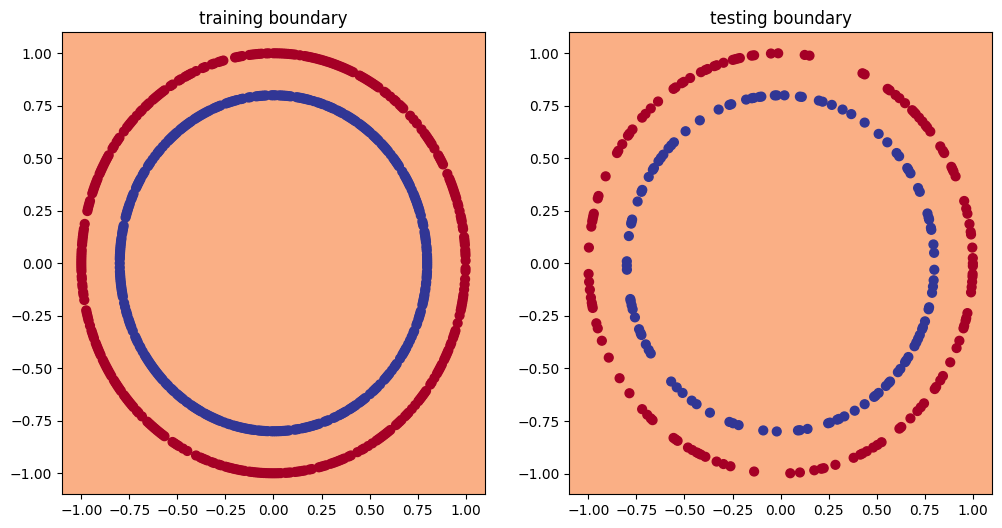

In [31]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('training boundary')
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('testing boundary')
plot_decision_boundary(model0, X_test, y_test)


In [32]:
class CircleModelv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 16)
    self.layer2 = nn.Linear(16, 32)
    self.layer3 = nn.Linear(32, 1)

  def forward(self, x):
    z = self.layer1(x)
    z = self.layer2(z)
    z = self.layer3(z)
    # print(z.shape)
    return z

In [33]:
model1 = CircleModelv1().to(device)
model1

CircleModelv1(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
)

In [34]:
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model1.parameters(), lr = 0.1)

In [35]:
y_train.shape

torch.Size([750])

In [36]:
epochs = 1000
for epoch in range(epochs):

  # set model to training mode
  model1.train()

  # forward pass and get the predictions
  train_logits = model1(X_train).squeeze()
  # print(train_logits.shape)
  # print(y_train.shape)
  # get the proper predictions from the logits
  train_preds = torch.round(torch.sigmoid(train_logits))

  # calculate the loss
  train_loss = loss(train_logits, y_train)

  # make optim grad zero
  optimizer.zero_grad()

  # backpropagation
  train_loss.backward()

  #apply the optimizer
  optimizer.step()

  # calculate train accuracy
  train_acc = accuracy(y_train, train_preds)

  ### Testing loop

  model1.eval()
  with torch.inference_mode():
    test_logs = model1(X_test).squeeze()

    # turn logs into preds
    test_preds = torch.round(torch.sigmoid(test_logs))

    # calculate the loss
    test_loss = loss(test_logs, y_test)

    # calculate the test accuracy
    test_acc = accuracy(y_test, test_preds)
  if epoch % 100 == 0:
    print(f'for {epoch} epoch train_acc:{train_acc}, train_loss:{train_loss}')
    print(f'test_acc:{test_acc}, test_loss:{test_loss}')
    print('\n')






for 0 epoch train_acc:0.4653333333333333, train_loss:0.6966331601142883
test_acc:0.448, test_loss:1.1751738786697388


for 100 epoch train_acc:0.5173333333333333, train_loss:0.6924794912338257
test_acc:0.448, test_loss:0.69785076379776


for 200 epoch train_acc:0.5173333333333333, train_loss:0.692478358745575
test_acc:0.448, test_loss:0.6978636980056763


for 300 epoch train_acc:0.5173333333333333, train_loss:0.6924782991409302
test_acc:0.448, test_loss:0.6978627443313599


for 400 epoch train_acc:0.5173333333333333, train_loss:0.6924782991409302
test_acc:0.448, test_loss:0.6978627443313599


for 500 epoch train_acc:0.5173333333333333, train_loss:0.6924782991409302
test_acc:0.448, test_loss:0.6978607773780823


for 600 epoch train_acc:0.5173333333333333, train_loss:0.692478358745575
test_acc:0.448, test_loss:0.6979010701179504


for 700 epoch train_acc:0.5173333333333333, train_loss:0.6924782991409302
test_acc:0.448, test_loss:0.6978630423545837


for 800 epoch train_acc:0.517333333333

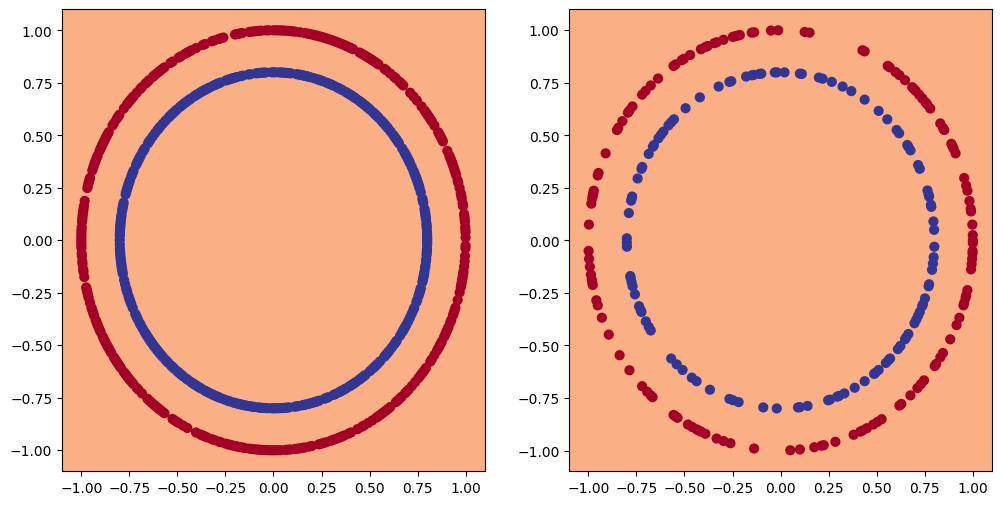

In [37]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model1, X_test, y_test)

**Create a linear Dataset and check weather the model is working or not**

In [38]:

w = 0.7
b = 0.3
step_size = 0.01
X_regression = torch.arange(0,1,step_size)
X_regression

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900])

In [39]:
y_regression = w * X_regression + b

In [40]:
y_regression

tensor([0.3000, 0.3070, 0.3140, 0.3210, 0.3280, 0.3350, 0.3420, 0.3490, 0.3560,
        0.3630, 0.3700, 0.3770, 0.3840, 0.3910, 0.3980, 0.4050, 0.4120, 0.4190,
        0.4260, 0.4330, 0.4400, 0.4470, 0.4540, 0.4610, 0.4680, 0.4750, 0.4820,
        0.4890, 0.4960, 0.5030, 0.5100, 0.5170, 0.5240, 0.5310, 0.5380, 0.5450,
        0.5520, 0.5590, 0.5660, 0.5730, 0.5800, 0.5870, 0.5940, 0.6010, 0.6080,
        0.6150, 0.6220, 0.6290, 0.6360, 0.6430, 0.6500, 0.6570, 0.6640, 0.6710,
        0.6780, 0.6850, 0.6920, 0.6990, 0.7060, 0.7130, 0.7200, 0.7270, 0.7340,
        0.7410, 0.7480, 0.7550, 0.7620, 0.7690, 0.7760, 0.7830, 0.7900, 0.7970,
        0.8040, 0.8110, 0.8180, 0.8250, 0.8320, 0.8390, 0.8460, 0.8530, 0.8600,
        0.8670, 0.8740, 0.8810, 0.8880, 0.8950, 0.9020, 0.9090, 0.9160, 0.9230,
        0.9300, 0.9370, 0.9440, 0.9510, 0.9580, 0.9650, 0.9720, 0.9790, 0.9860,
        0.9930])

In [41]:
X_regression = X_regression.unsqueeze(dim = 1)

In [42]:
y_regression = y_regression.unsqueeze(dim = 1)

In [43]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regression, y_regression, shuffle = False)

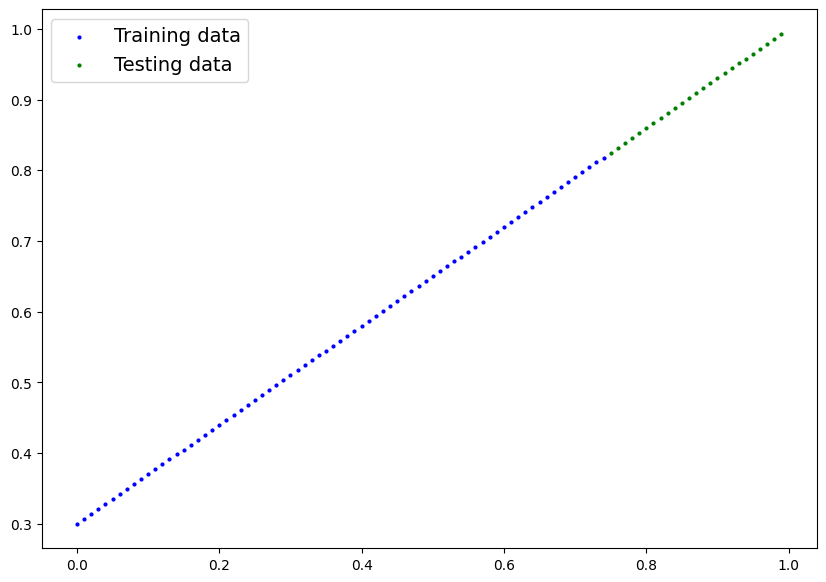

In [44]:
plot_predictions(X_reg_train, y_reg_train, X_reg_test, y_reg_test)

In [45]:
model2 = nn.Sequential(
    nn.Linear(1,8),
    nn.Linear(8,16),
    nn.Linear(16,1)
)
model2

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=16, bias=True)
  (2): Linear(in_features=16, out_features=1, bias=True)
)

In [46]:
loss = nn.L1Loss()
optim = torch.optim.SGD(params = model2.parameters(), lr = 0.01)

In [47]:
epochs = 1000
for epoch in range(epochs):

  model2.train()
  train_preds =  model2(X_reg_train)
  train_loss = loss(train_preds, y_reg_train)
  optim.zero_grad()
  train_loss.backward()
  optim.step()
  # train_acc = accuracy(y_train, train_preds)

  model2.eval()
  with torch.inference_mode():
    test_preds =  model2(X_reg_test)
    test_loss = loss(test_preds,y_reg_test)
  if epoch % 100 ==0:
    print(f'for epoch {epoch}, train_loss:{train_loss}, test_loss:{test_loss}')


for epoch 0, train_loss:0.24641354382038116, test_loss:0.3056156039237976
for epoch 100, train_loss:0.037089791148900986, test_loss:0.0052431439980864525
for epoch 200, train_loss:0.028948528692126274, test_loss:0.005190317519009113
for epoch 300, train_loss:0.02492680773139, test_loss:0.007856905460357666
for epoch 400, train_loss:0.024663276970386505, test_loss:0.0066051483154296875
for epoch 500, train_loss:0.025012392550706863, test_loss:0.007721152156591415
for epoch 600, train_loss:0.02327934093773365, test_loss:0.0075688292272388935
for epoch 700, train_loss:0.02258232980966568, test_loss:0.006977231707423925
for epoch 800, train_loss:0.022200409322977066, test_loss:0.006933631841093302
for epoch 900, train_loss:0.021885259076952934, test_loss:0.006818616297096014


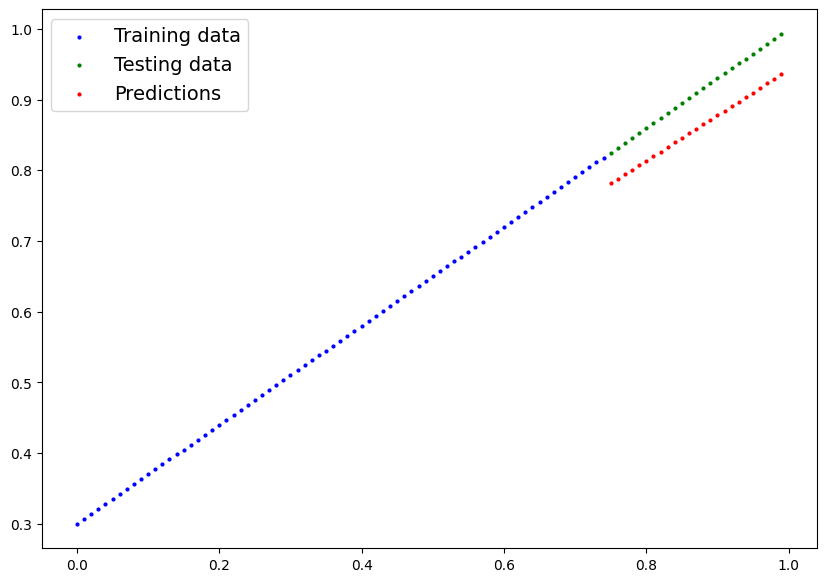

In [48]:
model2.eval()
y_preds = []
with torch.inference_mode():
  y_pred = model2(X_reg_test)
  # y_pred = torch.round(torch.sigmoid(y_logit))
  y_preds.append(y_pred)
plot_predictions(X_reg_train,y_reg_train,X_reg_test, y_reg_test, predictions = y_preds)

We see our model has ability to fit to linear data so we will use non linear to fit to our data

In [49]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples = 1000, noise = 0.03)



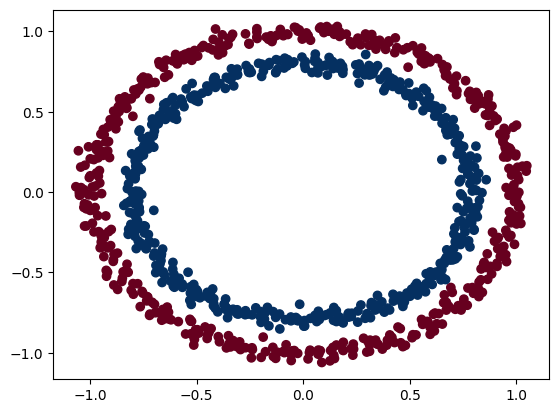

In [50]:
plt.scatter(X[:,0], X[:,1], c= y, cmap=plt.cm.RdBu)

In [51]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

In [52]:
y.dtype,X.dtype

(torch.float32, torch.float32)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [54]:
X_train.dtype

torch.float32

In [55]:
class Circlesv3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2,8)
    self.layer2 = nn.Linear(8,16)
    self.layer3 = nn.Linear(16,1)
    self.relu = nn.ReLU()

  def forward(self,x):
    z = self.relu(self.layer1(x))
    z = self.relu(self.layer2(z))
    z = self.relu(self.layer3(z))
    return z

In [56]:
model3 = Circlesv3()
model3

Circlesv3(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [57]:
loss = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(params = model3.parameters(), lr = 0.1)

In [58]:
epochs =1000
for epoch in range(epochs):

  model3.train() # model in training mode

  train_logits = model3(X_train).squeeze()

  train_preds = torch.round(torch.sigmoid(train_logits))

  train_loss = loss(train_logits, y_train)

  optim.zero_grad()

  train_loss.backward()

  optim.step()

  train_acc = accuracy(y_train, train_preds)

  ### Test loop

  model3.eval()
  with torch.inference_mode():
    test_logits = model3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss(test_logits, y_test)
    test_acc = accuracy(y_test, test_preds)

  if epoch % 100 ==0:
    print(f'the epoch :{epoch},train_loss:{train_loss}, train_acc:{train_acc}')
    print(f'test_loss:{test_loss}, test_acc:{test_acc}')
    print('\n')







the epoch :0,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :100,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :200,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :300,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :400,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :500,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :600,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :700,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :800,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :900,train_loss:0.6931473016738892, train_acc:0

In [59]:
len(X_train), len(y_train), len(X_test), len(y_test), len(test_preds)

(800, 800, 200, 200, 200)

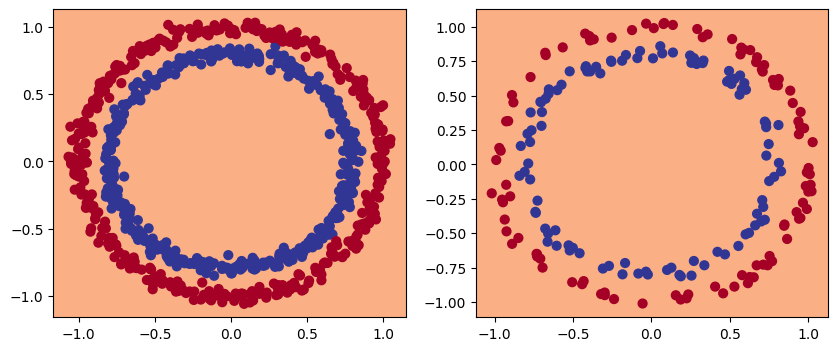

In [60]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plot_decision_boundary(model3,X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model3,X_test,y_test)

# **Replicating Non Linear Activation functions**

In [77]:
x = torch.arange(-5,10,1)
x = x.type(torch.float)
print(x.dtype)

torch.float32


In [72]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors


tensor([0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [75]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))


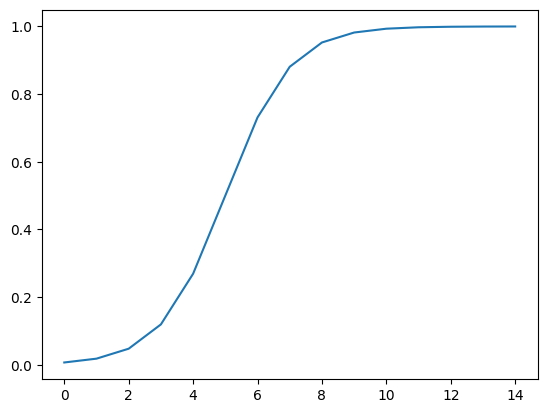

In [76]:
plt.plot(sigmoid(x))

In [ ]:
relu(x)

torch.float32



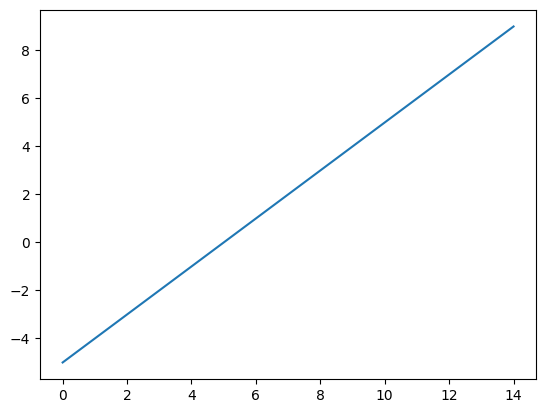

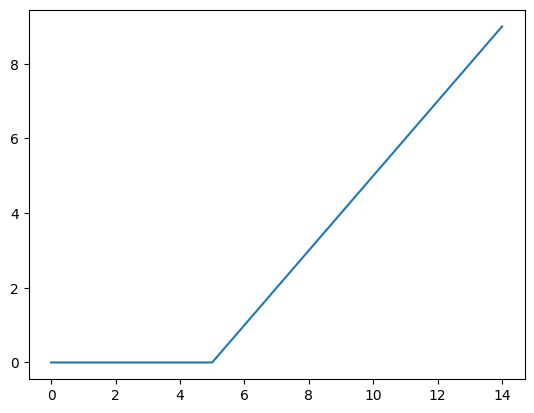

In [68]:

plt.plot(x)
plt.figure()
plt.plot(torch.relu(x))

# **Building Pytorch Multi class model**

In [89]:
N_SAMPLES = 1000
N_FEATURES = 2
N_CENTERS = 5
DEVIATION = 1.5


In [92]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = N_SAMPLES,
                 n_features = N_FEATURES,
                 cluster_std = DEVIATION,
                  centers = N_CENTERS,
                 random_state = 42)

In [93]:
X.shape

(1000, 2)

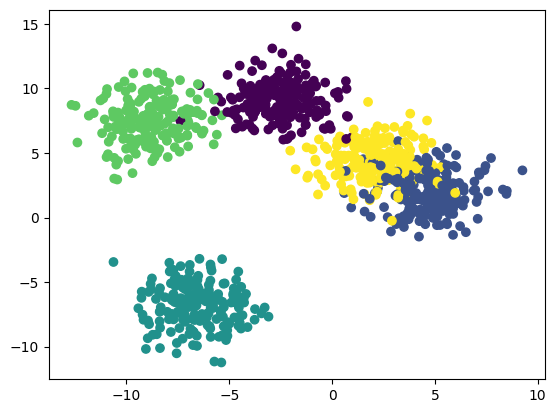

In [94]:
plt.scatter(X[:,0], X[:,1], c = y)

In [95]:
y.shape

(1000,)

In [96]:
X = torch.tensor(X,dtype = torch.float)
y = torch.tensor(y, dtype = torch.float)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)


In [99]:
X.shape[1]

2

torch.Size([1000])

In [105]:
class BolbData(nn.Module):
  def __init__(self, input_shape = X.shape[1],output_shape = N_CENTERS):
    super().__init__()

    self.layer1 = nn.Linear(input_shape, 8)
    self.layer2 = nn.Linear(8,16)
    self.layer3 = nn.Linear(16,output_shape)

    self.relu = nn.ReLU()

  def forward(self,x):

    x = self.relu(self.layer1(x))
    x = self.relu(self.layer2(x))
    x = self.relu(self.layer3(x))
    return x



In [106]:
model4 = BolbData()
model4

BolbData(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=5, bias=True)
  (relu): ReLU()
)

In [108]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params = model4.parameters(), lr = 0.01)


In [112]:
y_train.shape

torch.Size([800])

In [119]:
y_train.dtype

torch.float32

In [125]:
epochs = 1000
for epoch in range(epochs):
  model4.train()

  # forward Pass
  train_logits = model4(X_train)
  print(train_logits.shape)
  print(train_logits[0])

  #find the prds
  train_preds = torch.argmax(torch.softmax(train_logits, dim = 1), dim = 1).type(torch.float32)
  print(train_preds.shape)
  print(y_train.shape)
  print(train_preds)
  print(train_preds.dtype)

  # calculate the loss
  train_loss = loss(train_preds, y_train)

  # zero grad
  optim.zero_grad()

  # backward pass
  train_loss.backward()

  # optimizer step
  optim.step()

  # accuracy
  train_acc = accuracy(y_train, train_preds)

  # # # Test l0op

  model4.eval()

  test_logits = model4(X_test)
  test_preds = torch.argmax(torch.softmax(train_logits, dim = 1))
  test_loss = loss(test_preds, y_test)
  test_acc = accuracy(y_test, test_preds)
  break
  if epoch % 100 == 0:
    print(f'epoch:{epoch}, train_acc:{train_acc}, train_loss :{train_loss}')
    print(f'test_loss:{test_loss}, test_acc:{test_acc}')



torch.Size([800, 5])
tensor([0.0000, 0.3534, 0.1972, 0.1944, 0.5323], grad_fn=<SelectBackward0>)
torch.Size([800])
torch.Size([800])
tensor([4., 3., 4., 3., 3., 4., 4., 3., 4., 3., 3., 3., 3., 3., 3., 3., 4., 4.,
        3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 3.,
        3., 4., 3., 3., 3., 3., 4., 3., 3., 3., 4., 4., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 4., 3., 4., 4., 3., 4., 3., 3., 3., 3., 3., 3., 3., 4.,
        3., 3., 4., 3., 3., 3., 3., 3., 4., 4., 3., 4., 4., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 4., 3.,
        4., 3., 3., 4., 3., 4., 3., 3., 4., 3., 3., 3., 4., 3., 3., 3., 3., 3.,
        3., 3., 4., 3., 3., 3., 3., 4., 3., 3., 3., 4., 3., 3., 4., 3., 3., 3.,
        3., 3., 3., 3., 4., 3., 4., 3., 3., 3., 3., 4., 3., 4., 3., 3., 4., 4.,
        4., 4., 3., 3., 3., 3., 3., 4., 4., 3., 4., 3., 4., 3., 3.,

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [126]:
epochs = 1000
for epoch in range(epochs):
    model4.train()

    # Forward pass
    train_logits = model4(X_train)
    print(train_logits.shape)
    print(train_logits[0])

    # Find the predictions
    train_preds = torch.argmax(torch.softmax(train_logits, dim=1), dim=1).type(torch.float32)
    print(train_preds.shape)
    print(y_train.shape)
    print(train_preds)
    print(train_preds.dtype)

    # Calculate the loss
    train_loss = loss(train_logits, y_train)  # Use logits directly for loss calculation

    # Zero grad
    optim.zero_grad()

    # Backward pass
    train_loss.backward()

    # Optimizer step
    optim.step()

    # Accuracy
    train_acc = accuracy(y_train, train_preds)

    # Test loop
    model4.eval()
    with torch.no_grad():  # Disable gradient calculation for test loop
        test_logits = model4(X_test)
        test_preds = torch.argmax(torch.softmax(test_logits, dim=1), dim=1).type(torch.float32)
        test_loss = loss(test_logits, y_test)
        test_acc = accuracy(y_test, test_preds)

    if epoch % 100 == 0:
        print(f'epoch: {epoch}, train_acc: {train_acc}, train_loss: {train_loss}')
        print(f'test_loss: {test_loss}, test_acc: {test_acc}')


torch.Size([800, 5])
tensor([0.0000, 0.3534, 0.1972, 0.1944, 0.5323], grad_fn=<SelectBackward0>)
torch.Size([800])
torch.Size([800])
tensor([4., 3., 4., 3., 3., 4., 4., 3., 4., 3., 3., 3., 3., 3., 3., 3., 4., 4.,
        3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 3.,
        3., 4., 3., 3., 3., 3., 4., 3., 3., 3., 4., 4., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 4., 3., 4., 4., 3., 4., 3., 3., 3., 3., 3., 3., 3., 4.,
        3., 3., 4., 3., 3., 3., 3., 3., 4., 4., 3., 4., 4., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 4., 3.,
        4., 3., 3., 4., 3., 4., 3., 3., 4., 3., 3., 3., 4., 3., 3., 3., 3., 3.,
        3., 3., 4., 3., 3., 3., 3., 4., 3., 3., 3., 4., 3., 3., 4., 3., 3., 3.,
        3., 3., 3., 3., 4., 3., 4., 3., 3., 3., 3., 4., 3., 4., 3., 3., 4., 4.,
        4., 4., 3., 3., 3., 3., 3., 4., 4., 3., 4., 3., 4., 3., 3.,

RuntimeError: expected scalar type Long but found Float